In [30]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import pickle

In [176]:
from sklearn.metrics import silhouette_score, calinski_harabaz_score, davies_bouldin_score, silhouette_samples
from sklearn.cluster import AgglomerativeClustering, AffinityPropagation, DBSCAN, KMeans, SpectralClustering
from sklearn.preprocessing import scale

In [90]:
def evaluate_clustering(X, cluster_labels):
    s = silhouette_score(X, cluster_labels)
    c = calinski_harabaz_score(X, cluster_labels)
    d = davies_bouldin_score(X, cluster_labels)
    print("Clustering results:")
    print(f"\tSilhouette Score: \t{s:.2f}")
    print(f"\tCalinski Harabaz Score: {c:.2f}")
    print(f"\tDavies Bouldin Score: \t{d:.2f}")
    return s,c,d

# Ignore the DivideByZero warnings
import warnings
warnings.filterwarnings('ignore')

In [188]:
# Plot the silhouette scores
import matplotlib.cm as cm

def plot_silhouette(X, labels):
    # Plot the silhouette scores 
    fig, ax1 = plt.subplots(1, 1, figsize=(8,6))
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, labels)

    y_lower = 10
    n_clusters = len(np.unique(labels))
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_score(X, labels), color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# Handcrafted features

In [122]:
# Handcrafted_features
X = np.load('data/timeseries/class_1/handrafted_features.npy')
var_names = np.loadtxt('data/timeseries/class_1/handrafted_features_varnames.txt', dtype=str)
pat_names = np.loadtxt('data/timeseries/class_1/handrafted_features_patnames.txt', dtype=str)

# Remove the time component
X_notime = scale(X[:,:-2])

# Load patient_properties
with open('data/patient_properties.p', 'rb') as handle:
    patient_properties = pickle.load(handle)

# Get the original labels
c_gender = []
c_age = []
c_immunized = []
c_pregnant = []
c_transfused = []
for patid in pat_names:
    c_gender.append(patient_properties[patid]['gender'])
    c_age.append(patient_properties[patid]['yob'])
    c_immunized.append(patient_properties[patid]['immunized'])
    c_pregnant.append(patient_properties[patid]['pregnant'])
    c_transfused.append(patient_properties[patid]['transfused'])

In [49]:
# Featur selection
from feat_sel import spec
def get_top_N_features(X, n, feat_name=False):
    # Compute the SPEC score
    specscore = spec(X)
    idx = np.argsort(specscore)[-n:]
    if feat_name:
        return X[:,idx], var_names[idx]
    else:
        return X[:,idx]

### Evaluation of multiple clustering algorithm on full dataset

In [123]:
####################
# KMeans
####################

# Play with n_clusters
for i in range(2,11):
    print(f"{i} Clusters")
    clust= KMeans(n_clusters=i).fit(X_notime)
    evaluate_clustering(X_notime, clust.labels_)
    print()

2 Clusters
Clustering results:
	Silhouette Score: 	0.79
	Calinski Harabaz Score: 72.96
	Davies Bouldin Score: 	1.71

3 Clusters
Clustering results:
	Silhouette Score: 	0.78
	Calinski Harabaz Score: 60.82
	Davies Bouldin Score: 	1.33

4 Clusters
Clustering results:
	Silhouette Score: 	0.71
	Calinski Harabaz Score: 60.38
	Davies Bouldin Score: 	1.49

5 Clusters
Clustering results:
	Silhouette Score: 	0.75
	Calinski Harabaz Score: 60.56
	Davies Bouldin Score: 	0.91

6 Clusters
Clustering results:
	Silhouette Score: 	0.72
	Calinski Harabaz Score: 64.71
	Davies Bouldin Score: 	0.88

7 Clusters
Clustering results:
	Silhouette Score: 	0.72
	Calinski Harabaz Score: 62.05
	Davies Bouldin Score: 	0.64

8 Clusters
Clustering results:
	Silhouette Score: 	0.71
	Calinski Harabaz Score: 69.21
	Davies Bouldin Score: 	0.65

9 Clusters
Clustering results:
	Silhouette Score: 	0.73
	Calinski Harabaz Score: 72.03
	Davies Bouldin Score: 	0.58

10 Clusters
Clustering results:
	Silhouette Score: 	0.72
	Calins

N_clusters = 2 seems to be the best choice for KMeans. The clustering performance degrades starting from 7 clusters. Let's evaluate the effect of feature selection.

In [172]:
# Play with n_feat

for n in [10, 20, 50, 100, 200]:
    print(f"{n} Selected features")
    X_n = get_top_N_features(X_notime, n)
    for i in range(2,6):
        print(f"{i} Clusters")
        clust= KMeans(n_clusters=i).fit(X_n)
        evaluate_clustering(X_n, clust.labels_)
        print()
    print()

10 Selected features
2 Clusters
Clustering results:
	Silhouette Score: 	0.79
	Calinski Harabaz Score: 254.57
	Davies Bouldin Score: 	1.09

3 Clusters
Clustering results:
	Silhouette Score: 	0.76
	Calinski Harabaz Score: 209.51
	Davies Bouldin Score: 	1.27

4 Clusters
Clustering results:
	Silhouette Score: 	0.71
	Calinski Harabaz Score: 170.81
	Davies Bouldin Score: 	1.18

5 Clusters
Clustering results:
	Silhouette Score: 	0.72
	Calinski Harabaz Score: 152.53
	Davies Bouldin Score: 	0.95


20 Selected features
2 Clusters
Clustering results:
	Silhouette Score: 	0.76
	Calinski Harabaz Score: 209.99
	Davies Bouldin Score: 	1.20

3 Clusters
Clustering results:
	Silhouette Score: 	0.73
	Calinski Harabaz Score: 162.65
	Davies Bouldin Score: 	1.38

4 Clusters
Clustering results:
	Silhouette Score: 	0.73
	Calinski Harabaz Score: 135.61
	Davies Bouldin Score: 	1.48

5 Clusters
Clustering results:
	Silhouette Score: 	0.70
	Calinski Harabaz Score: 117.13
	Davies Bouldin Score: 	1.47


50 Selected 

Selecting features doesn't seem to improve the clustering ability. Best silhouette coefficient: 2 clusters and 10 features.

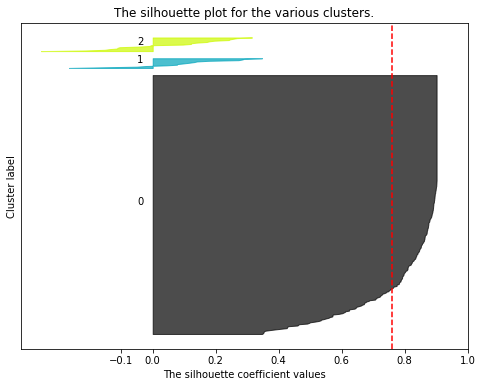

In [198]:
X_n = get_top_N_features(X_notime, 10)
plot_silhouette(X_n, KMeans(n_clusters=3).fit(X_n).labels_)

## DBSCAN

In [164]:
####################
# DBSCAN
####################
# As a note, silhouette coeff and other metrics are not optimal for density based clustering methods.

# Play with n_clusters
for i in [0.1,0.15,0.2,0.5, 50]:
    print(f"Eps: {i}")
    clust = DBSCAN(eps=i, min_samples=8).fit(X_notime)
    evaluate_clustering(X_notime, clust.labels_)
    print()

Eps: 0.1
Clustering results:
	Silhouette Score: 	-0.41
	Calinski Harabaz Score: 2.24
	Davies Bouldin Score: 	2.84

Eps: 0.15
Clustering results:
	Silhouette Score: 	-0.38
	Calinski Harabaz Score: 2.56
	Davies Bouldin Score: 	2.84

Eps: 0.2
Clustering results:
	Silhouette Score: 	-0.35
	Calinski Harabaz Score: 2.89
	Davies Bouldin Score: 	2.84

Eps: 0.5
Clustering results:
	Silhouette Score: 	-0.16
	Calinski Harabaz Score: 5.57
	Davies Bouldin Score: 	2.81

Eps: 50
Clustering results:
	Silhouette Score: 	0.85
	Calinski Harabaz Score: 60.80
	Davies Bouldin Score: 	2.03



There's an evident mistake here as an eps of 80 pulls together most of the points (407) into one cluster and leaves the noise out.

In [170]:
# Play with n_clusters
for n in [10, 20, 50, 100, 200]:
    print(f"{n} Selected features")
    X_n = get_top_N_features(X_notime, n)
    for i in [0.2,0.5]:
        print(f"Eps: {i}")
        clust = DBSCAN(eps=i, min_samples=4).fit(X_n)
        evaluate_clustering(X_n, clust.labels_)
        print()
    print()

10 Selected features
Eps: 0.2
Clustering results:
	Silhouette Score: 	0.27
	Calinski Harabaz Score: 11.39
	Davies Bouldin Score: 	1.75

Eps: 0.5
Clustering results:
	Silhouette Score: 	0.57
	Calinski Harabaz Score: 101.81
	Davies Bouldin Score: 	1.64


20 Selected features
Eps: 0.2
Clustering results:
	Silhouette Score: 	0.04
	Calinski Harabaz Score: 9.27
	Davies Bouldin Score: 	1.97

Eps: 0.5
Clustering results:
	Silhouette Score: 	0.18
	Calinski Harabaz Score: 27.66
	Davies Bouldin Score: 	1.86


50 Selected features
Eps: 0.2
Clustering results:
	Silhouette Score: 	-0.21
	Calinski Harabaz Score: 8.88
	Davies Bouldin Score: 	2.30

Eps: 0.5
Clustering results:
	Silhouette Score: 	-0.11
	Calinski Harabaz Score: 6.29
	Davies Bouldin Score: 	2.25


100 Selected features
Eps: 0.2
Clustering results:
	Silhouette Score: 	-0.27
	Calinski Harabaz Score: 6.38
	Davies Bouldin Score: 	2.43

Eps: 0.5
Clustering results:
	Silhouette Score: 	-0.09
	Calinski Harabaz Score: 11.68
	Davies Bouldin Score

In [169]:
from sklearn.preprocessing import scale
X_n = get_top_N_features(X_notime, 10)
clust = DBSCAN(eps=0.5, min_samples=4).fit(X_n)
np.unique(clust.labels_, return_counts=True)

(array([-1,  0]), array([114, 324]))

The unexpectedly high value for eps 0.5 and n 10 is due to the same effect as above. DBSCAN is not a good solution.

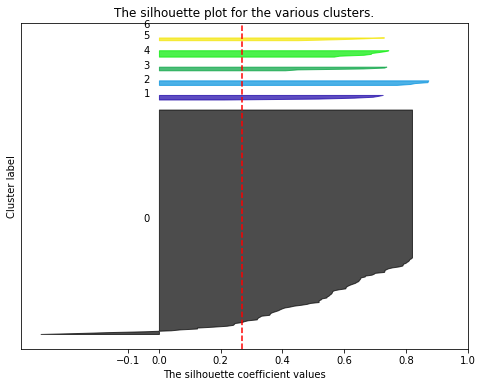

In [272]:
X_n = get_top_N_features(X_notime, 10)
plot_silhouette(X_n, DBSCAN(eps=0.2, min_samples=4).fit(X_n).labels_)

The low average silhouette score is due to the noise points

## Hierarchical clustering

In [173]:
####################
# Agglomerative Clustering
####################
# As a note, silhouette coeff and other metrics are not optimal for density based clustering methods.

# Play with n_clusters
for i in range(2,11):
    print(f"{i} Clusters")
    clust= AgglomerativeClustering(n_clusters=i).fit(X_notime)
    evaluate_clustering(X_notime, clust.labels_)
    print()

2 Clusters
Clustering results:
	Silhouette Score: 	0.87
	Calinski Harabaz Score: 69.92
	Davies Bouldin Score: 	1.39

3 Clusters
Clustering results:
	Silhouette Score: 	0.86
	Calinski Harabaz Score: 60.78
	Davies Bouldin Score: 	0.99

4 Clusters
Clustering results:
	Silhouette Score: 	0.65
	Calinski Harabaz Score: 60.10
	Davies Bouldin Score: 	1.68

5 Clusters
Clustering results:
	Silhouette Score: 	0.64
	Calinski Harabaz Score: 61.94
	Davies Bouldin Score: 	1.44

6 Clusters
Clustering results:
	Silhouette Score: 	0.65
	Calinski Harabaz Score: 63.81
	Davies Bouldin Score: 	1.29

7 Clusters
Clustering results:
	Silhouette Score: 	0.65
	Calinski Harabaz Score: 65.41
	Davies Bouldin Score: 	1.02

8 Clusters
Clustering results:
	Silhouette Score: 	0.64
	Calinski Harabaz Score: 67.22
	Davies Bouldin Score: 	1.03

9 Clusters
Clustering results:
	Silhouette Score: 	0.64
	Calinski Harabaz Score: 69.18
	Davies Bouldin Score: 	1.14

10 Clusters
Clustering results:
	Silhouette Score: 	0.64
	Calins

In [174]:
# Play with n_feat

for n in [10, 20, 50, 100, 200]:
    print(f"{n} Selected features")
    X_n = get_top_N_features(X_notime, n)
    for i in range(2,6):
        print(f"{i} Clusters")
        clust= AgglomerativeClustering(n_clusters=i).fit(X_n)
        evaluate_clustering(X_n, clust.labels_)
        print()
    print()

10 Selected features
2 Clusters
Clustering results:
	Silhouette Score: 	0.78
	Calinski Harabaz Score: 204.93
	Davies Bouldin Score: 	1.16

3 Clusters
Clustering results:
	Silhouette Score: 	0.77
	Calinski Harabaz Score: 176.81
	Davies Bouldin Score: 	1.15

4 Clusters
Clustering results:
	Silhouette Score: 	0.71
	Calinski Harabaz Score: 155.51
	Davies Bouldin Score: 	1.14

5 Clusters
Clustering results:
	Silhouette Score: 	0.71
	Calinski Harabaz Score: 140.68
	Davies Bouldin Score: 	0.95


20 Selected features
2 Clusters
Clustering results:
	Silhouette Score: 	0.75
	Calinski Harabaz Score: 202.47
	Davies Bouldin Score: 	1.24

3 Clusters
Clustering results:
	Silhouette Score: 	0.74
	Calinski Harabaz Score: 160.60
	Davies Bouldin Score: 	1.37

4 Clusters
Clustering results:
	Silhouette Score: 	0.74
	Calinski Harabaz Score: 131.62
	Davies Bouldin Score: 	1.33

5 Clusters
Clustering results:
	Silhouette Score: 	0.72
	Calinski Harabaz Score: 111.88
	Davies Bouldin Score: 	1.55


50 Selected 

Hierarchical clustering with 3 clusters seems to be quite strong.

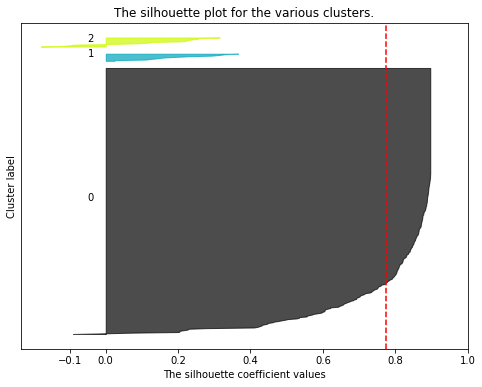

In [214]:
X_n = get_top_N_features(X_notime, 10)
plot_silhouette(X_n, AgglomerativeClustering(n_clusters=3).fit(X_n).labels_)

## Spectral Clustering

In [216]:
####################
# Spectral Clustering
####################
# As a note, silhouette coeff and other metrics are not optimal for density based clustering methods.

# Play with n_clusters
for i in range(2,11):
    print(f"{i} Clusters")
    clust= SpectralClustering(n_clusters=i).fit(X_notime)
    evaluate_clustering(X_notime, clust.labels_)
    print()

2 Clusters
Clustering results:
	Silhouette Score: 	0.62
	Calinski Harabaz Score: 3.08
	Davies Bouldin Score: 	0.30

3 Clusters
Clustering results:
	Silhouette Score: 	0.59
	Calinski Harabaz Score: 2.89
	Davies Bouldin Score: 	0.31

4 Clusters
Clustering results:
	Silhouette Score: 	0.60
	Calinski Harabaz Score: 5.20
	Davies Bouldin Score: 	0.43

5 Clusters
Clustering results:
	Silhouette Score: 	0.59
	Calinski Harabaz Score: 4.15
	Davies Bouldin Score: 	0.28

6 Clusters
Clustering results:
	Silhouette Score: 	0.60
	Calinski Harabaz Score: 5.20
	Davies Bouldin Score: 	0.43

7 Clusters
Clustering results:
	Silhouette Score: 	0.59
	Calinski Harabaz Score: 4.15
	Davies Bouldin Score: 	0.28

8 Clusters
Clustering results:
	Silhouette Score: 	0.59
	Calinski Harabaz Score: 4.15
	Davies Bouldin Score: 	0.28

9 Clusters
Clustering results:
	Silhouette Score: 	0.59
	Calinski Harabaz Score: 4.15
	Davies Bouldin Score: 	0.28

10 Clusters
Clustering results:
	Silhouette Score: 	0.59
	Calinski Harab

In [217]:
# Play with n_feat
for n in [10, 20, 50, 100, 200]:
    print(f"{n} Selected features")
    X_n = get_top_N_features(X_notime, n)
    for i in range(2,6):
        print(f"{i} Clusters")
        clust= SpectralClustering(n_clusters=i).fit(X_n)
        evaluate_clustering(X_n, clust.labels_)
        print()
    print()

10 Selected features
2 Clusters
Clustering results:
	Silhouette Score: 	0.85
	Calinski Harabaz Score: 35.57
	Davies Bouldin Score: 	0.10

3 Clusters
Clustering results:
	Silhouette Score: 	0.77
	Calinski Harabaz Score: 44.42
	Davies Bouldin Score: 	0.49

4 Clusters
Clustering results:
	Silhouette Score: 	0.73
	Calinski Harabaz Score: 40.15
	Davies Bouldin Score: 	0.65

5 Clusters
Clustering results:
	Silhouette Score: 	0.78
	Calinski Harabaz Score: 25.53
	Davies Bouldin Score: 	0.13


20 Selected features
2 Clusters
Clustering results:
	Silhouette Score: 	0.85
	Calinski Harabaz Score: 40.31
	Davies Bouldin Score: 	0.10

3 Clusters
Clustering results:
	Silhouette Score: 	0.85
	Calinski Harabaz Score: 40.31
	Davies Bouldin Score: 	0.10

4 Clusters
Clustering results:
	Silhouette Score: 	0.84
	Calinski Harabaz Score: 40.56
	Davies Bouldin Score: 	0.10

5 Clusters
Clustering results:
	Silhouette Score: 	0.85
	Calinski Harabaz Score: 40.31
	Davies Bouldin Score: 	0.10


50 Selected features

LinAlgError: 4-th leading minor of the array is not positive definite

It seems that reducing the number of features considerably improves the clustering statistics. Let's visualize this.

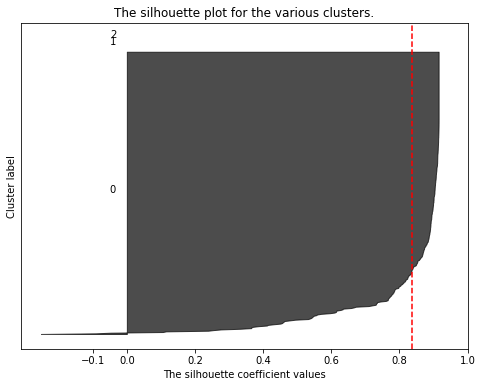

In [220]:
X_n = get_top_N_features(X_notime, 20)
plot_silhouette(X_n, SpectralClustering(n_clusters=3).fit(X_n).labels_)

UNfortunately, this only represents a large cluster with 2 very small clusters.

## Affinity propagation

In [225]:
####################
# Affinity propagation
####################
# As a note, silhouette coeff and other metrics are not optimal for density based clustering methods.

print("Clusters")
for damp in [0.5, 0.6, 0.8, 0.9]:
    print(f"Damping: {damp}")
    clust= AffinityPropagation(damping=damp).fit(X_notime)
    evaluate_clustering(X_notime, clust.labels_)
    print()

Clusters
Damping: 0.5
Clustering results:
	Silhouette Score: 	0.27
	Calinski Harabaz Score: 292.67
	Davies Bouldin Score: 	0.30

Damping: 0.6
Clustering results:
	Silhouette Score: 	0.27
	Calinski Harabaz Score: 292.67
	Davies Bouldin Score: 	0.30

Damping: 0.8
Clustering results:
	Silhouette Score: 	0.28
	Calinski Harabaz Score: 294.72
	Davies Bouldin Score: 	0.29

Damping: 0.9
Clustering results:
	Silhouette Score: 	0.27
	Calinski Harabaz Score: 282.36
	Davies Bouldin Score: 	0.29



In [224]:
# Play with n_feat
for n in [10, 20, 50, 100, 200]:
    print(f"{n} Selected features")
    X_n = get_top_N_features(X_notime, n)
    clust= AffinityPropagation().fit(X_n)
    evaluate_clustering(X_n, clust.labels_)
    print()

10 Selected features
Clustering results:
	Silhouette Score: 	0.09
	Calinski Harabaz Score: 103.93
	Davies Bouldin Score: 	0.78

20 Selected features
Clustering results:
	Silhouette Score: 	0.42
	Calinski Harabaz Score: 264.95
	Davies Bouldin Score: 	0.36

50 Selected features
Clustering results:
	Silhouette Score: 	0.28
	Calinski Harabaz Score: 130.28
	Davies Bouldin Score: 	0.38

100 Selected features
Clustering results:
	Silhouette Score: 	0.28
	Calinski Harabaz Score: 141.32
	Davies Bouldin Score: 	0.37

200 Selected features
Clustering results:
	Silhouette Score: 	-0.06
	Calinski Harabaz Score: 78.73
	Davies Bouldin Score: 	0.88



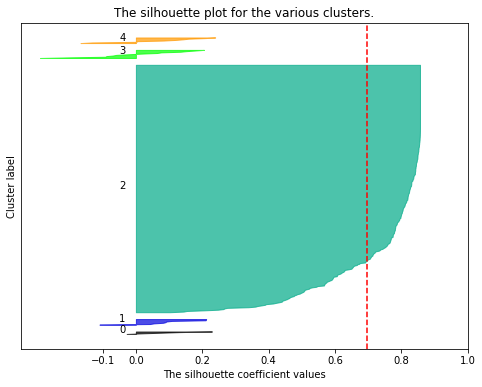

In [268]:
X_n = get_top_N_features(X_notime, 20)
plot_silhouette(X_n, AffinityPropagation(preference=-350).fit(X_n).labels_)

In [267]:
np.unique(AffinityPropagation(preference=-350).fit(X_n).labels_, return_counts=True)

(array([0, 1, 2, 3, 4]), array([  5,  10, 399,  14,  10]))